In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import xlwings as xw 
from scipy import stats


import re
import time
import datetime
import pickle
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')



%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

In [92]:
'''
np.set_printoptions(suppress=True)
#不采用科学计数法
pd.set_option('display.float_format',lambda x :'%.5f' % x)
'''

In [2]:
fileName = 'C:\\Users\\ms\\Desktop\\modelBin\\model_bin_testdata.csv'
dataSet = pd.read_csv(fileName)

In [3]:
dataSet.head()

,appl_ostype,appl_gender,duration_applied,fuzzy_address_ind,state,td_7day_p2p,td_7day_xd,td_7day_bank,td_7day_other,td_1mon_p2p,...,high_blk_cbk,mdl_high_blk_cbk,mdl_blk_cbk,mdl_low_blk_cbk,dr_cbk,gc_cbk,zhongan_yd_score,zhongan_yd_prob,gb,wgt
0,ios,1,9,0,1,4,5,0,0,8,...,0.0,0.0,0.0,0.0,1.0,1.0,459,0.215381,1,1
1,android,2,9,0,1,1,2,0,0,7,...,0.0,0.0,0.0,0.0,1.0,1.0,465,0.182021,0,1
2,android,1,6,0,1,3,2,0,0,4,...,0.0,0.0,0.0,1.0,1.0,1.0,455,0.239607,0,1
3,ios,1,12,1,1,1,1,0,0,4,...,0.0,0.0,0.0,0.0,1.0,1.0,459,0.215037,1,1
4,ios,2,3,0,1,0,0,0,0,2,...,0.0,0.0,0.0,0.0,1.0,1.0,463,0.196194,0,1


In [95]:
dataSet.describe()

,appl_gender,duration_applied,fuzzy_address_ind,state,td_7day_p2p,td_7day_xd,td_7day_bank,td_7day_other,td_1mon_p2p,td_1mon_xd,...,high_blk_cbk,mdl_high_blk_cbk,mdl_blk_cbk,mdl_low_blk_cbk,dr_cbk,gc_cbk,zhongan_yd_score,zhongan_yd_prob,gb,wgt
count,10152.00000,10152.00000,10152.00000,10152.00000,10152.00000,10152.00000,10152.00000,10152.00000,10152.00000,10152.00000,...,9894.00000,9894.00000,9894.00000,9894.00000,9894.00000,9894.00000,10152.00000,10152.00000,10152.00000,10152.00000
mean,1.30201,9.82920,0.10323,1.00000,2.22941,1.07979,0.19622,0.00670,4.25936,2.34614,...,0.05033,0.05953,0.10784,0.21872,0.98646,0.98888,460.15563,0.21883,0.17721,1.00000
std,0.45915,3.46100,0.30428,0.00000,1.87772,1.30590,0.46651,0.08157,3.02416,2.17153,...,0.25053,0.25867,0.37185,0.60797,0.11559,0.10486,12.92967,0.07120,0.38186,0.00000
min,1.00000,3.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,422.00000,0.03075,0.00000,1.00000
25%,1.00000,6.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,2.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,451.00000,0.16651,0.00000,1.00000
50%,1.00000,12.00000,0.00000,1.00000,2.00000,1.00000,0.00000,0.00000,4.00000,2.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,459.00000,0.21679,0.00000,1.00000
75%,2.00000,12.00000,0.00000,1.00000,3.00000,2.00000,0.00000,0.00000,6.00000,3.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,468.00000,0.26773,0.00000,1.00000
max,2.00000,12.00000,1.00000,1.00000,18.00000,15.00000,4.00000,1.00000,30.00000,22.00000,...,6.00000,3.00000,7.00000,17.00000,1.00000,1.00000,521.00000,0.49892,1.00000,1.00000


### 处理异常值

In [3]:
dataCopy = dataSet.copy()

In [4]:

from sklearn.preprocessing import LabelEncoder
# 将字符型转换成数值型
le = LabelEncoder()
dataCopy['appl_ostype'] = le.fit_transform(dataCopy['appl_ostype'].values)
del dataCopy['wgt']

In [5]:
dataCopy.head()

,appl_ostype,appl_gender,duration_applied,fuzzy_address_ind,state,td_7day_p2p,td_7day_xd,td_7day_bank,td_7day_other,td_1mon_p2p,...,cl_cbk,high_blk_cbk,mdl_high_blk_cbk,mdl_blk_cbk,mdl_low_blk_cbk,dr_cbk,gc_cbk,zhongan_yd_score,zhongan_yd_prob,gb
0,2,1,9,0,1,4,5,0,0,8,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,459,0.215381,1
1,0,2,9,0,1,1,2,0,0,7,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,465,0.182021,0
2,0,1,6,0,1,3,2,0,0,4,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,455,0.239607,0
3,2,1,12,1,1,1,1,0,0,4,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,459,0.215037,1
4,2,2,3,0,1,0,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,463,0.196194,0


In [45]:
dataCopy.describe()

,appl_ostype,appl_gender,duration_applied,fuzzy_address_ind,state,td_7day_p2p,td_7day_xd,td_7day_bank,td_7day_other,td_1mon_p2p,...,cl_cbk,high_blk_cbk,mdl_high_blk_cbk,mdl_blk_cbk,mdl_low_blk_cbk,dr_cbk,gc_cbk,zhongan_yd_score,zhongan_yd_prob,gb
count,10152.000000,10152.000000,10152.000000,10152.000000,10152.0,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,...,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,10152.000000,10152.000000,10152.000000
mean,1.004827,1.302009,9.829196,0.103231,1.0,2.229413,1.079787,0.196217,0.006698,4.259358,...,0.214372,0.050334,0.059531,0.107843,0.218718,0.986456,0.988882,460.155634,0.218827,0.177206
std,0.991579,0.459152,3.460998,0.304275,0.0,1.877719,1.305904,0.466505,0.081572,3.024155,...,1.746271,0.250529,0.258669,0.371850,0.607967,0.115592,0.104859,12.929673,0.071203,0.381862
min,0.000000,1.000000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,422.000000,0.030753,0.000000
25%,0.000000,1.000000,6.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,451.000000,0.166513,0.000000
50%,1.000000,1.000000,12.000000,0.000000,1.0,2.000000,1.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,459.000000,0.216787,0.000000
75%,2.000000,2.000000,12.000000,0.000000,1.0,3.000000,2.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,468.000000,0.267729,0.000000
max,2.000000,2.000000,12.000000,1.000000,1.0,18.000000,15.000000,4.000000,1.000000,30.000000,...,82.000000,6.000000,3.000000,7.000000,17.000000,1.000000,1.000000,521.000000,0.498918,1.000000


In [6]:
allFeatures = dataCopy.columns.tolist()

In [7]:
# 把类别型的变量和数值型的变量分开
# 原则是小于10个类别的数值型视作类别型变量来处理
# 大于10个类别的数值型变量视作数值型变量

numerical_cols = [] # 连续型特征
for col in allFeatures[:-1]:
    if len(dataCopy[col].unique()) >= 10 :
        numerical_cols.append(col)
        
categorical_cols = [i for i in allFeatures if i not in numerical_cols]   # 离散型特征
categorical_cols = categorical_cols[:-1] # 最后一列是target

In [8]:
print('numerical_cols: ',len(numerical_cols))
print('categorical_cols: ',len(categorical_cols))

numerical_cols:  745
categorical_cols:  355


In [9]:
#%%
# 对于离散型变量，如果缺失值的比例占到50%以上，那么把它移除。
# 否则使用一个特殊的状态(-100)来填充缺失值。
catCopy = categorical_cols.copy()
for col in catCopy:
    catRate = len(dataCopy[col][pd.isnull(dataCopy[col])])/len(dataCopy)
    #print('{0} has missing rate as {1}'.format(col,catRate))
    if catRate > 0.5:
        print('{0} has missing rate as {1} drop {2}'.format(col,catRate,col))
        dataCopy.drop([col],axis=1,inplace=True)
        categorical_cols.remove(col)
        allFeatures.remove(col)
    if 0 < catRate <= 0.5:
        dataCopy[col] = dataCopy[col].fillna(-100)

td_2309351 has missing rate as 0.9724192277383766 drop td_2309351
td_2309401 has missing rate as 0.5858944050433412 drop td_2309401
td_2309371 has missing rate as 0.5986012608353034 drop td_2309371
td_2309467 has missing rate as 0.8374704491725768 drop td_2309467
td_2309459 has missing rate as 0.6264775413711584 drop td_2309459
td_2309475 has missing rate as 0.8114657210401891 drop td_2309475
td_2309461 has missing rate as 0.980397951142632 drop td_2309461
td_2309487 has missing rate as 0.9470055161544523 drop td_2309487
td_2309489 has missing rate as 0.9934988179669031 drop td_2309489
td_2309477 has missing rate as 0.9668045705279747 drop td_2309477
td_2309479 has missing rate as 0.9916272655634357 drop td_2309479
td_2309493 has missing rate as 0.9916272655634357 drop td_2309493
td_2309473 has missing rate as 0.9976359338061466 drop td_2309473
td_2309481 has missing rate as 0.999113475177305 drop td_2309481
td_2309491 has missing rate as 0.9997044917257684 drop td_2309491
td_2309405 h

-----

In [10]:
#%%   
# 对于连续性变量，缺失值的比例超过0.3的直接剔除
# 未超过0.3的缺失值使用该列值的中位数


for col in numerical_cols.copy():
    numRate = len(dataCopy[col][pd.isnull(dataCopy[col])])/len(dataCopy)
    #print('{0} has missing rate as {1}'.format(col,rate))
    if numRate > 0.2:
        dataCopy.drop(col,axis=1,inplace=True)
        numerical_cols.remove(col)
        allFeatures.remove(col)
        print('{0} has missing rate as {1} drop {2}'.format(col,numRate,col))
    elif numRate > 0:
#使用随机值
#            not_missing = data_all[data_all[col] == data_all[col]][col]
#            makeuped = data_all[col].map(lambda x: MakeupRandom(x, list(not_missing)))
#            data_all.drop(col,axis=1,inplace=True)
        dataCopy[col] = dataCopy[col].fillna(dataCopy[col].dropna().median())
  

In [11]:
# 查看其中有一个类别的占比是否超过90%，超过则剔除掉
def MaximumBinPcnt(df,col):
    """
    变量中数量最多的值占比
    """
    maxPcnt = df[col].value_counts().tolist()[0]/len(df)
    return maxPcnt

del_feats_moreVal = [] # 保存因为值占比大于0.9的变量


for col in numerical_cols.copy():
    maxPcnt = MaximumBinPcnt(dataCopy,col)
    if maxPcnt > 0.9:
        print('{} is deleted from numerical_cols because of large percentage of value'.format(col))
        del_feats_moreVal.append(col)
        numerical_cols.remove(col)
        allFeatures.remove(col)
        
for col in categorical_cols.copy():
    maxPcnt = MaximumBinPcnt(dataCopy,col)
    if maxPcnt > 0.9:
        print('{} is deleted from categorical_cols because of large percentage of value'.format(col))
        del_feats_moreVal.append(col)
        categorical_cols.remove(col)
        allFeatures.remove(col)

bl_call01_l is deleted from numerical_cols because of large percentage of value
bl_ibcall01_l is deleted from numerical_cols because of large percentage of value
bl_obcall01_l is deleted from numerical_cols because of large percentage of value
bl_call02_l is deleted from numerical_cols because of large percentage of value
bl_ibcall02_l is deleted from numerical_cols because of large percentage of value
bl_obcall02_l is deleted from numerical_cols because of large percentage of value
bl_call03_l is deleted from numerical_cols because of large percentage of value
bl_ibcall03_l is deleted from numerical_cols because of large percentage of value
bl_obcall03_l is deleted from numerical_cols because of large percentage of value
cl_call01_l is deleted from numerical_cols because of large percentage of value
clcmpy_ibcall01_l is deleted from numerical_cols because of large percentage of value
cl_call02_n is deleted from numerical_cols because of large percentage of value
cl_call02_l is deleted

F010_cnt is deleted from numerical_cols because of large percentage of value
F011_cnt is deleted from numerical_cols because of large percentage of value
F016_cnt is deleted from numerical_cols because of large percentage of value
F017_cnt is deleted from numerical_cols because of large percentage of value
F018_cnt is deleted from numerical_cols because of large percentage of value
F019_cnt is deleted from numerical_cols because of large percentage of value
F020_cnt is deleted from numerical_cols because of large percentage of value
F023_cnt is deleted from numerical_cols because of large percentage of value
F025_cnt is deleted from numerical_cols because of large percentage of value
F026_cnt is deleted from numerical_cols because of large percentage of value
Z001_cnt is deleted from numerical_cols because of large percentage of value
Z002_cnt is deleted from numerical_cols because of large percentage of value
cbk_call_cl_pingan_n is deleted from numerical_cols because of large percent

direct_contact_cnt is deleted from categorical_cols because of large percentage of value
general_contact_cnt is deleted from categorical_cols because of large percentage of value
mobile_state is deleted from categorical_cols because of large percentage of value
mcclbl_call01_n is deleted from categorical_cols because of large percentage of value
mcclbl_ibcall01_n is deleted from categorical_cols because of large percentage of value
mcbl_obcall01_n is deleted from categorical_cols because of large percentage of value
mcclbl_ibcall02_n is deleted from categorical_cols because of large percentage of value
mcbl_obcall02_n is deleted from categorical_cols because of large percentage of value
mcclbl_ibcall03_n is deleted from categorical_cols because of large percentage of value
mcbl_obcall03_n is deleted from categorical_cols because of large percentage of value
td_2309505 is deleted from categorical_cols because of large percentage of value
td_2309507 is deleted from categorical_cols becau

cl_pingan_cbk is deleted from categorical_cols because of large percentage of value
high_blk_cbk is deleted from categorical_cols because of large percentage of value
mdl_high_blk_cbk is deleted from categorical_cols because of large percentage of value
dr_cbk is deleted from categorical_cols because of large percentage of value
gc_cbk is deleted from categorical_cols because of large percentage of value


-----

In [12]:
analysisFile = 'C:\\Users\\ms\\Desktop\\modelBin\\'

In [54]:
wb=xw.Book(analysisFile+'analysis1.xlsx') #打开文件  
detail_sheet=xw.Sheet("Sheet1") #sheet名称  
  
detail_sheet.range('A1').options(transpose=True).value = dataCopy.describe()
wb.save()
wb.close()

In [55]:
wb2=xw.Book(analysisFile+'analysis1.xlsx')
detail_sheet2=xw.Sheet("Sheet2")

detail_sheet2.range('A1').options(transpose=True).value = dataCopy['appl_ostype'].value_counts()
lastIndedx = xw.Range('A1').expand('table').last_cell.row

for i in range(1,len(allFeatures)):
    detail_sheet2.range('A'+str(lastIndedx+4)).options(transpose=True).value = dataCopy[allFeatures[i]].value_counts()
    lastIndedx =  xw.Range('A'+str(lastIndedx+4)).expand('table').last_cell.row

wb2.save()
wb2.close()

## 分箱，采用ChiMerge,要求分箱完之后：

1. 不超过5箱

2. Bad Rate单调

3. 每箱同时包含好坏样本

4. 特殊值如－98,-99,-100，单独成一箱

连续型变量可直接分箱

类别型变量：

1. 当取值较多时unique>5，先用bad rate编码，再用连续型分箱的方式进行分箱

2. 当取值较少时unique<5：

    （1）如果每种类别同时包含好坏样本，无需分箱
    
    （2）如果有类别只包含好坏样本的一种，需要合并

In [13]:
print("连续型变量：",len(numerical_cols))
print(numerical_cols)
print('- - - - - - - - - - - - - - - - - - - - ')
print("离散型变量：",len(categorical_cols))
print(categorical_cols)

连续型变量： 562
['td_7day_p2p', 'td_7day_xd', 'td_1mon_p2p', 'td_1mon_xd', 'td_3mon_p2p', 'td_3mon_xd', 'td_6mon_p2p', 'td_6mon_xd', 'td_6mon_bank', 'age', 'calldetail_no', 'call01_n', 'ibcall01_n', 'obcall01_n', 'call01_l', 'ibcall01_l', 'obcall01_l', 'call2nd_n', 'ibcall2nd_n', 'obcall2nd_n', 'call2nd_l', 'ibcall2nd_l', 'obcall2nd_l', 'call3rd_n', 'ibcall3rd_n', 'obcall3rd_n', 'call3rd_l', 'ibcall3rd_l', 'obcall3rd_l', 'call02_n', 'ibcall02_n', 'obcall02_n', 'call02_l', 'ibcall02_l', 'obcall02_l', 'call03_n', 'ibcall03_n', 'obcall03_n', 'call03_l', 'ibcall03_l', 'obcall03_l', 'dr_call01_n', 'dr_ibcall01_n', 'dr_obcall01_n', 'dr_call01_l', 'dr_ibcall01_l', 'dr_obcall01_l', 'dr_call2nd_n', 'dr_ibcall2nd_n', 'dr_obcall2nd_n', 'dr_call2nd_l', 'dr_ibcall2nd_l', 'dr_obcall2nd_l', 'dr_call3rd_n', 'dr_ibcall3rd_n', 'dr_obcall3rd_n', 'dr_call3rd_l', 'dr_ibcall3rd_l', 'dr_obcall3rd_l', 'dr_call02_n', 'dr_ibcall02_n', 'dr_obcall02_n', 'dr_call02_l', 'dr_ibcall02_l', 'dr_obcall02_l', 'dr_call03_n', '

In [14]:
more_value_catFeats = []  # 离散标签中unique值 > 5
less_value_catFeats = []  # 离散标签中unique值 < 5

### 第一步，检查类别型变量中，哪些变量取值超过5

In [15]:

for var in categorical_cols:
    valueCounts = len(set(dataCopy[var]))
    #print(valueCounts)
    if valueCounts > 5:
        more_value_catFeats.append(var)  # 取值超过5的变量，需要bad rate编码，再用卡方分箱法进行分箱
    else:
        less_value_catFeats.append(var)

In [16]:
"""
test

"""
print("unique>5的离散型变量：",len(more_value_catFeats))
print(more_value_catFeats)
print('- - - - - - - - - - - - - - - - - - - - ')
print("unique<5的离散型变量：",len(less_value_catFeats))
print(less_value_catFeats)

unique>5的离散型变量： 47
['td_1mon_bank', 'td_3mon_bank', 'xd_channel', 'status_0_cnt', 't5_call03_cb_n', 'td_2309499', 'nfcs_marriage_status', 'nfcs_loan_age', 'cl_org_cnt', 'org_cnt_1m', 'org_cnt_2m', 'cl_org_cnt_2m', 'org_cnt_3m', 'cl_org_cnt_3m', 'B001_cnt', 'B014_cnt', 't5_cnt_call_cbk', 't5_tm_call_cbk', 't5_cnt_ibcall_cbk', 't5_tm_ibcall_cbk', 't5_cnt_obcall_cbk', 't5_tm_obcall_cbk', 't5_cnt_call_10d_cbk', 't5_tm_call_10d_cbk', 't5_cnt_ibcall_10d_cbk', 't5_tm_ibcall_10d_cbk', 't5_cnt_obcall_10d_cbk', 't5_tm_obcall_10d_cbk', 't5_cnt_call01_cbk', 't5_tm_call01_cbk', 't5_cnt_ibcall01_cbk', 't5_tm_ibcall01_cbk', 't5_cnt_obcall01_cbk', 't5_tm_obcall01_cbk', 't5_cnt_call02_cbk', 't5_tm_call02_cbk', 't5_cnt_ibcall02_cbk', 't5_tm_ibcall02_cbk', 't5_cnt_obcall02_cbk', 't5_tm_obcall02_cbk', 't5_cnt_call03_cbk', 't5_tm_call03_cbk', 't5_cnt_ibcall03_cbk', 't5_tm_ibcall03_cbk', 't5_cnt_obcall03_cbk', 't5_tm_obcall03_cbk', 'mdl_blk_cbk']
- - - - - - - - - - - - - - - - - - - - 
unique<5的离散型变量： 43
[

-----

#### （i）当离散变量unique<5时：

        如果每种类别同时包含好坏样本，无需分箱；
        
        如果有类别只包含好坏样本的一种，需要合并

In [17]:
def BinBadRate(df, col, target, grantRateIndicator=0):
    '''
    :param df: 需要计算好坏比率的数据集
    :param col: 需要计算好坏比率的特征
    :param target: 好坏标签
    :param grantRateIndicator: 1返回总体的坏样本率，0不返回
    :return: 每箱的坏样本率，以及总体的坏样本率（当grantRateIndicator＝＝1时）
    '''
    total = df.groupby([col])[target].count()
    total = pd.DataFrame({'total': total})
    bad = df.groupby([col])[target].sum()
    bad = pd.DataFrame({'bad': bad})
    regroup = total.merge(bad, left_index=True, right_index=True, how='left') # 每箱的坏样本数，总样本数
    regroup.reset_index(level=0, inplace=True)  # 更改索引
    regroup['bad_rate'] = regroup.apply(lambda x: x.bad * 1.0 / x.total, axis=1) # 加上一列坏样本率
    dicts = dict(zip(regroup[col],regroup['bad_rate'])) # col箱对应的坏样本率组成的字典
    if grantRateIndicator==0:
        return (dicts,regroup)
    N = sum(regroup['total'])
    B = sum(regroup['bad'])
    overallRate = B * 1.0 / N
    return (dicts, regroup, overallRate)

In [18]:
"""
test
"""
BinBadRate(dataCopy,'status_cnt','gb',1)

({4: 0.17736670293797607, 5: 0.0, 6: 0.14285714285714285},
    status_cnt  total   bad  bad_rate
 0           4  10109  1793  0.177367
 1           5      1     0  0.000000
 2           6     42     6  0.142857,
 0.17720646178092986)

In [19]:
def MergeBad0(df,col,target, direction='bad'):
    '''
     :param df: 包含检验0％或者100%坏样本率
     :param col: 分箱后的变量或者类别型变量。检验其中是否有一组或者多组没有坏样本或者没有好样本。如果是，则需要进行合并
     :param target: 目标变量，0、1表示好、坏
     :return: 合并方案，使得每个组里同时包含好坏样本
     '''
    regroup = BinBadRate(df, col, target)[1]
    if direction == 'bad' or direction == 'all':
        # 如果是合并0坏样本率的组，则跟最小的非0坏样本率的组进行合并
        regroup = regroup.sort_values(by = 'bad_rate')
    else:
        # 如果是合并0好样本样本率的组，则跟最小的非0好样本率的组进行合并
        regroup = regroup.sort_values(by='bad_rate',ascending=False)
        
    regroup.index = range(regroup.shape[0]) # 重置regroup索引，使其从0开始
    col_regroup = [[i] for i in regroup[col]] # col列的unique值
    del_index = []
    for i in range(regroup.shape[0]-1):
        col_regroup[i+1] = col_regroup[i] + col_regroup[i+1]
        del_index.append(i)  # 需要合并的变量索引的集合
        if direction == 'bad':
            if regroup['bad_rate'][i+1] > 0:
                break
        elif direction == 'good':
            if regroup['bad_rate'][i+1] < 1:
                break
        elif direction == 'all' :
            # 既有全是good的又有全是bad的
            continue
    col_regroup2 = [col_regroup[i] for i in range(len(col_regroup)) if i not in del_index] # 不需合并的变量集合
    newGroup = {}
    for i in range(len(col_regroup2)):
        for g2 in col_regroup2[i]:
            newGroup[g2] = 'Bin '+str(i)
    return newGroup # 需要合并的变量具有相同的值


In [20]:
"""
test
# 离散型unique <5 的col变量合并，使其变量中同时包含好坏
"""
directionTest = 'bad'
regroupTest = BinBadRate(dataCopy, 'status_cnt', 'gb')[1]
col_regroupTest = [[i] for i in regroupTest['status_cnt']] # col列的unique值
del_indexTest = []
for i in range(regroupTest.shape[0]-1):
    col_regroupTest[i+1] = col_regroupTest[i] + col_regroupTest[i+1]
    del_indexTest.append(i)
    if directionTest == 'bad':
        if regroupTest['bad_rate'][i+1] > 0:
            break
    else:
        if regroupTest['bad_rate'][i+1] < 1:
            break
col_regroup2Test = [col_regroupTest[i] for i in range(len(col_regroupTest)) if i not in del_indexTest] 


print("col_regroup: ",col_regroupTest)
print('---------------------')
print("需要合并的del_index: ",del_indexTest)
print('---------------------')
print("不需要合并的col_regroup2: ",col_regroup2Test)
print('---------------------')
print("合并后结果: ",MergeBad0(dataCopy,'status_cnt','gb', direction='bad'))

col_regroup:  [[4], [4, 5], [4, 5, 6]]
---------------------
需要合并的del_index:  [0, 1]
---------------------
不需要合并的col_regroup2:  [[4, 5, 6]]
---------------------
合并后结果:  {5: 'Bin 0', 6: 'Bin 0', 4: 'Bin 1'}


In [21]:
merge_bin_dict = {}  # 存放需要合并的变量，以及合并方法(即改编后相同的值合并)
var_bin_list = []  # 由于某个取值没有好或者坏样本而需要合并的变量
for col in less_value_catFeats:
    binBadRate = BinBadRate(dataCopy, col, 'gb')[0]
    if (min(binBadRate.values())) == 0 and (max(binBadRate.values()) == 1):  # 由于col中既有缺好样本的值又有缺坏样本的值而进行合并
        print('{} need to be combined due to not only 0 bad rate but also 0 good rate'.format(col))
        combine_bin = MergeBad0(dataCopy, col, 'gb','all')   # {5: 'Bin 0', 6: 'Bin 0', 4: 'Bin 1'}
        merge_bin_dict[col] = combine_bin
        newVar = col + '_Bin'
        dataCopy[newVar] = dataCopy[col].map(combine_bin)
        var_bin_list.append(newVar)
    
    elif min(binBadRate.values()) == 0:  # 由于某个取值没有坏样本而进行合并
        print('{} need to be combined due to 0 bad rate'.format(col))
        combine_bin = MergeBad0(dataCopy, col, 'gb','bad')
        merge_bin_dict[col] = combine_bin
        newVar = col + '_Bin'
        dataCopy[newVar] = dataCopy[col].map(combine_bin)
        var_bin_list.append(newVar)
    elif max(binBadRate.values()) == 1:  # 由于某个取值没有好样本而进行合并
        print('{} need to be combined due to 0 good rate'.format(col))
        combine_bin = MergeBad0(dataCopy, col, 'gb', direction='good')
        merge_bin_dict[col] = combine_bin
        newVar = col + '_Bin'
        dataCopy[newVar] = dataCopy[col].map(combine_bin)
        var_bin_list.append(newVar)
        
# less_value_features里剩下不需要合并的变量
less_value_catFeats = [i for i in less_value_catFeats if i + '_Bin' not in var_bin_list]

In [22]:
"""
test
# unique<5 的需要合并变量的离散型特征结果
"""
print("由于变量不同时包含好坏需要合并的变量：",len(var_bin_list))
print("    ",var_bin_list)
print('---------------------')
print('unique<5的特征中不需要合并的变量: ',len(less_value_catFeats))
print("    ",less_value_catFeats)
print('---------------------')
print("需要合并的col及方法： ")
print("    ",merge_bin_dict)


由于变量不同时包含好坏需要合并的变量： 0
     []
---------------------
unique<5的特征中不需要合并的变量:  43
     ['appl_ostype', 'appl_gender', 'duration_applied', 'fuzzy_address_ind', 'td_7day_bank', 'homecity_tier', 't3_call03_cb_n', 'td_2309403', 'td_2309369', 'hr_org_cnt', 'cl_org_cnt_1m', 'hr_org_cnt_2m', 'hr_org_cnt_3m', 'dr_call_cbk', 'dr_ibcall_cbk', 'dr_obcall_cbk', 'dr_call_10d_cbk', 'dr_ibcall_10d_cbk', 'dr_obcall_10d_cbk', 'dr_call01_cbk', 'dr_ibcall01_cbk', 'dr_obcall01_cbk', 'dr_call02_cbk', 'dr_ibcall02_cbk', 'dr_obcall02_cbk', 'dr_call03_cbk', 'dr_ibcall03_cbk', 'dr_obcall03_cbk', 'gc_call_cbk', 'gc_ibcall_cbk', 'gc_obcall_cbk', 'gc_call_10d_cbk', 'gc_ibcall_10d_cbk', 'gc_obcall_10d_cbk', 'gc_call01_cbk', 'gc_ibcall01_cbk', 'gc_obcall01_cbk', 'gc_call02_cbk', 'gc_ibcall02_cbk', 'gc_obcall02_cbk', 'gc_call03_cbk', 'gc_ibcall03_cbk', 'gc_obcall03_cbk']
---------------------
需要合并的col及方法： 
     {}


In [23]:
# 保存unique<5列的变量不同时含有好样本和坏样本的合并方式

folderOfData = 'C:\\Users\\ms\\Desktop\\modelBin\\'
file1 = open(folderOfData+ 'merge_bin_dict.pkl', 'wb+')
pickle.dump(merge_bin_dict, file1)
file1.close()

#### （ii）当取值>5时：

        用bad_rate进行编码，放入连续型变量里

In [24]:


def BadRateEncoding(df, col, target):
    '''
    :param df: dataframe containing feature and target
    :param col: the feature that needs to be encoded with bad rate, usually categorical type
    :param target: good/bad indicator
    :return: the assigned bad rate to encode the categorical feature
    '''
    regroup = BinBadRate(df, col, target, grantRateIndicator=0)[1]
    # set_index(col) 将col转换为索引
    # .to_dict() 根据col索引将bad_rate转换为字典格式：{'col值': {'bad_rate': **}}
    # orient='index'参数形成{index -> {column -> value}}的结构,还有‘dict’, ‘list’, ‘series’, ‘split’,‘records’
    br_dict = regroup[[col,'bad_rate']].set_index([col]).to_dict(orient='index') 
    # 转换为{col:bad_rate}格式
    for k, v in br_dict.items():
        br_dict[k] = v['bad_rate']
    badRateEnconding = df[col].map(lambda x: br_dict[x]) # 将col列的值转换为该列的bad_rate
    return {'encoding':badRateEnconding, 'bad_rate':br_dict}





In [25]:
dataCopy['mdl_blk_cbk'].value_counts()

 0.0      8972
 1.0       814
-100.0     258
 2.0        85
 3.0        17
 5.0         3
 6.0         1
 7.0         1
 4.0         1
Name: mdl_blk_cbk, dtype: int64

In [26]:
"""
test
#
"""

regroupTest = BinBadRate(dataCopy, 'mdl_blk_cbk', 'gb', grantRateIndicator=0)[1]
br_dictTest = regroupTest[['mdl_blk_cbk','bad_rate']].set_index(['mdl_blk_cbk']).to_dict(orient='index') 
print("转换前：")
print(br_dictTest)
# 转换为{col:bad_rate}格式
for k, v in br_dictTest.items():
    br_dictTest[k] = v['bad_rate']
print("转换后：")
print(br_dictTest)

转换前：
{-100.0: {'bad_rate': 0.1511627906976744}, 0.0: {'bad_rate': 0.17967008470798038}, 1.0: {'bad_rate': 0.15847665847665848}, 2.0: {'bad_rate': 0.18823529411764706}, 3.0: {'bad_rate': 0.11764705882352941}, 4.0: {'bad_rate': 0.0}, 5.0: {'bad_rate': 0.3333333333333333}, 6.0: {'bad_rate': 0.0}, 7.0: {'bad_rate': 0.0}}
转换后：
{-100.0: 0.1511627906976744, 0.0: 0.17967008470798038, 1.0: 0.15847665847665848, 2.0: 0.18823529411764706, 3.0: 0.11764705882352941, 4.0: 0.0, 5.0: 0.3333333333333333, 6.0: 0.0, 7.0: 0.0}


In [27]:
br_encoding_dict = {}  # 记录按照bad rate进行编码的变量，及编码方式
for col in more_value_catFeats:
    print
    br_encoding = BadRateEncoding(dataCopy, col, 'gb')
    dataCopy[col + '_br_encoding'] = br_encoding['encoding']
    br_encoding_dict[col] = br_encoding['bad_rate']
    numerical_cols.append(col + '_br_encoding')

In [28]:
br_encoding_dict

{'td_1mon_bank': {0: 0.17640467424363696,
  1: 0.17472643840451818,
  2: 0.18618988902589395,
  3: 0.18867924528301888,
  4: 0.22727272727272727,
  5: 0.2},
 'td_3mon_bank': {0: 0.17275597654488048,
  1: 0.17909062789978347,
  2: 0.18714194780394652,
  3: 0.168,
  4: 0.1691542288557214,
  5: 0.24675324675324675,
  6: 0.2222222222222222,
  7: 0.0},
 'xd_channel': {0: 0.17645709040844423,
  1: 0.20588235294117646,
  8: 0.18235294117647058,
  9: 0.10714285714285714,
  10: 0.2727272727272727,
  13: 0.0},
 'status_0_cnt': {0: 0.3269230769230769,
  1: 0.1746031746031746,
  2: 0.14022140221402213,
  3: 0.171,
  4: 0.17832409972299168,
  5: 0.0,
  6: 0.17647058823529413},
 't5_call03_cb_n': {0: 0.17661691542288557,
  1: 0.1981981981981982,
  2: 0.18545994065281898,
  3: 0.18359941944847605,
  4: 0.18147159740754862,
  5: 0.1703922395613665},
 'td_2309499': {-100.0: 0.1360725720384205,
  10.0: 0.16681859617137648,
  15.0: 0.17774176121015667,
  20.0: 0.18110795454545456,
  25.0: 0.1928429423459

In [29]:
# 保存unique>5列的bad_rate编码方式

file2 = open(folderOfData + 'br_encoding_dict.pkl', 'wb+')
pickle.dump(br_encoding_dict, file2)
file2.close()

-----

## 第二步：对连续型变量进行分箱

In [30]:
def SplitData(df, col, numOfSplit, special_attribute=[]):
    '''
    :param df: 按照col排序后的数据集
    :param col: 待分箱的变量
    :param numOfSplit: 切分的组别数
    :param special_attribute: 在切分数据集的时候，某些特殊值需要排除在外
    :return: 在原数据集上增加一列，把原始细粒度的col重新划分成粗粒度的值，便于分箱中的合并处理
    返回切分点区间右边的值
    '''
    df2 = df.copy()
    if special_attribute != []:
        df2 = df.loc[~df[col].isin(special_attribute)]
    N = df2.shape[0]
    n = int(N/numOfSplit)
    splitPointIndex = [i*n for i in range(1,numOfSplit)] # 按照numOfSplit为间隔划分
    rawValues = sorted(list(df2[col]))
    splitPoint = [rawValues[i] for i in splitPointIndex]
    splitPoint = sorted(list(set(splitPoint)))
    return splitPoint # col中“切分点“右边第一个值

In [31]:
"""
test
# SplitData
"""
SplitData(dataCopy,'zhongan_yd_score',5)

[449, 456, 462, 471]

In [32]:
def Chi2(df, total_col, bad_col):
    '''
    :param df: 包含全部样本总计与坏样本总计的数据框(BinBadRate)
    :param total_col: 全部样本的个数
    :param bad_col: 坏样本的个数
    :return: 卡方值
    '''
    df2 = df.copy()
    # 求出df中，总体的坏样本率和好样本率
    badRate = sum(df2[bad_col])*1.0/sum(df2[total_col])
    # 当全部样本只有好或者坏样本时，卡方值为0
    if badRate in [0,1]:
        return 0
    df2['good'] = df2.apply(lambda x: x[total_col] - x[bad_col], axis = 1)
    goodRate = sum(df2['good']) * 1.0 / sum(df2[total_col])
    # 期望坏（好）样本个数＝全部样本个数*平均坏（好）样本占比
    df2['badExpected'] = df[total_col].apply(lambda x: x*badRate)
    df2['goodExpected'] = df[total_col].apply(lambda x: x * goodRate)
    badCombined = zip(df2['badExpected'], df2[bad_col])
    goodCombined = zip(df2['goodExpected'], df2['good'])
    badChi = [(i[0]-i[1])**2/i[0] for i in badCombined]
    goodChi = [(i[0] - i[1]) ** 2 / i[0] for i in goodCombined]
    chi2 = sum(badChi) + sum(goodChi)
    return chi2

In [76]:
"""
test
"""
_, regroupTest, _ = BinBadRate(dataCopy, 'zhongan_yd_score', 'gb', grantRateIndicator=1)
Chi2(regroupTest,'total','bad')

272.4272606019276

In [33]:
def AssignBin(x, cutOffPoints,special_attribute=[]):
    '''
    :param x: 某个变量的某个取值
    :param cutOffPoints: 上述变量的分箱结果，用切分点表示
    :param special_attribute:  不参与分箱的特殊取值
    :return: 分箱后的对应的第几个箱，从0开始
    for example, if splitPoint = [10,20,30], if x = 7, return Bin 0. If x = 35, return Bin 3
    '''
    numBin = len(cutOffPoints) + 1 + len(special_attribute)
    if x in special_attribute:
        i = special_attribute.index(x)+1
        return 'Bin {}'.format(0-i)
    if x<=cutOffPoints[0]:
        return 'Bin 0'
    elif x > cutOffPoints[-1]:
        return 'Bin {}'.format(numBin-1)
    else:
        for i in range(0,numBin-1):
            if cutOffPoints[i] < x <=  cutOffPoints[i+1]:
                return 'Bin {}'.format(i+1)
 

In [80]:
"""
test
"""
AssignBin(444,[434, 442, 460, 474],[-98,-99,-100])

'Bin 2'

In [34]:
### ChiMerge_MaxInterval: split the continuous variable using Chi-square value by specifying the max number of intervals
def ChiMerge(df, col, target, max_interval=5,special_attribute=[],minBinPcnt=0):
    '''
    :param df: 包含目标变量与分箱属性的数据框
    :param col: 需要分箱的属性
    :param target: 目标变量，取值0或1
    :param max_interval: 最大分箱数。如果原始属性的取值个数低于该参数，不执行这段函数
    :param special_attribute: 不参与分箱的属性取值
    :param minBinPcnt：最小箱的占比，默认为0
    :return: 分箱结果
    '''
    colLevels = sorted(list(set(df[col]))) # col列的值排序
    N_distinct = len(colLevels) 
    if N_distinct <= max_interval:  #如果原始属性的取值个数低于max_interval，不执行这段函数
        print ("The number of original levels for {} is less than or equal to max intervals".format(col))
        return colLevels[:-1]
    else:
        # 不包含speciaL_attribute
        if len(special_attribute)>=1:
            df1 = df.loc[df[col].isin(special_attribute)]
            df2 = df.loc[~df[col].isin(special_attribute)]
        else:
            df2 = df.copy() # 去掉special_attribute后的df
        N_distinct = len(list(set(df2[col]))) #去除speciaL_attribute之后的元素个数

        # 步骤一: 通过col对数据集进行分组，求出每组的总样本数与坏样本数
        # 最大切分100个组
        if N_distinct > 100:
            split_x = SplitData(df2, col, 100)
            df2['temp'] = df2[col].map(lambda x: AssignGroup(x, split_x))
            # Assgingroup函数：每一行的数值和切分点做对比，返回原值在切分后的映射，
            # 经过map以后，生成该特征的值对象的“分箱”后的值
        else:
            df2['temp'] = df2[col]
        # 总体bad rate将被用来计算expected bad count
        (binBadRate, regroup, overallRate) = BinBadRate(df2, 'temp', target, grantRateIndicator=1)

        # 首先，每个单独的属性值将被分为单独的一组
        # 对属性值进行排序，然后两两组别进行合并
        colLevels = sorted(list(set(df2['temp'])))
        groupIntervals = [[i] for i in colLevels] #把每个箱的值打包成[[],[]]的形式

        # 步骤二：建立循环，不断合并最优的相邻两个组别，直到：
        # 1，最终分裂出来的分箱数<＝预设的最大分箱数
        # 2，每箱的占比不低于预设值（可选）
        # 3，每箱同时包含好坏样本
        # 如果有特殊属性，那么最终分裂出来的分箱数＝预设的最大分箱数－特殊属性的个数
        split_intervals = max_interval - len(special_attribute)
        while (len(groupIntervals) > split_intervals):  # 终止条件: 当前分箱数＝预设的分箱数
            # 每次循环时, 计算合并相邻组别后的卡方值。具有最小卡方值的合并方案，是最优方案
            chisqList = []
            for k in range(len(groupIntervals)-1):
                temp_group = groupIntervals[k] + groupIntervals[k+1]
                df2b = regroup.loc[regroup['temp'].isin(temp_group)]
                #chisq = Chi2(df2b, 'total', 'bad', overallRate)
                chisq = Chi2(df2b, 'total', 'bad')
                chisqList.append(chisq)
            best_comnbined = chisqList.index(min(chisqList))
            # 把groupIntervals的值改成类似的值改成类似从[[1][2],[3]]到[[1,2],[3]]
            groupIntervals[best_comnbined] = groupIntervals[best_comnbined] + groupIntervals[best_comnbined+1]
            groupIntervals.remove(groupIntervals[best_comnbined+1])
        groupIntervals = [sorted(i) for i in groupIntervals]
        cutOffPoints = [max(i) for i in groupIntervals[:-1]] #

        # 检查是否有箱没有好或者坏样本。如果有，需要跟相邻的箱进行合并，直到每箱同时包含好坏样本
        groupedvalues = df2['temp'].apply(lambda x: AssignBin(x, cutOffPoints)) #每个原始箱对应卡方分箱后的箱号
        df2['temp_Bin'] = groupedvalues
        (binBadRate,regroup) = BinBadRate(df2, 'temp_Bin', target)
        #返回（每箱坏样本率字典，和包含“列名、坏样本数、总样本数、坏样本率的数据框”）
        [minBadRate, maxBadRate] = [min(binBadRate.values()),max(binBadRate.values())]
        while minBadRate ==0 or maxBadRate == 1:
            # 找出全部为好／坏样本的箱
            indexForBad01 = regroup[regroup['bad_rate'].isin([0,1])].temp_Bin.tolist()
            bin=indexForBad01[0]
            # 如果是最后一箱，则需要和上一个箱进行合并，也就意味着分裂点cutOffPoints中的最后一个需要移除
            if bin == max(regroup.temp_Bin):
                cutOffPoints = cutOffPoints[:-1]
            # 如果是第一箱，则需要和下一个箱进行合并，也就意味着分裂点cutOffPoints中的第一个需要移除
            elif bin == min(regroup.temp_Bin):
                cutOffPoints = cutOffPoints[1:]
            # 如果是中间的某一箱，则需要和前后中的一个箱进行合并，依据是较小的卡方值
            else:
                # 和前一箱进行合并，并且计算卡方值
                currentIndex = list(regroup.temp_Bin).index(bin)
                prevIndex = list(regroup.temp_Bin)[currentIndex - 1]
                df3 = df2.loc[df2['temp_Bin'].isin([prevIndex, bin])]
                (binBadRate, df2b) = BinBadRate(df3, 'temp_Bin', target)
                #chisq1 = Chi2(df2b, 'total', 'bad', overallRate)
                chisq1 = Chi2(df2b, 'total', 'bad')
                # 和后一箱进行合并，并且计算卡方值
                laterIndex = list(regroup.temp_Bin)[currentIndex + 1]
                df3b = df2.loc[df2['temp_Bin'].isin([laterIndex, bin])]
                (binBadRate, df2b) = BinBadRate(df3b, 'temp_Bin', target)
                #chisq2 = Chi2(df2b, 'total', 'bad', overallRate)
                chisq2 = Chi2(df2b, 'total', 'bad')
                if chisq1 < chisq2:
                    cutOffPoints.remove(cutOffPoints[currentIndex - 1])
                else:
                    cutOffPoints.remove(cutOffPoints[currentIndex])
            # 完成合并之后，需要再次计算新的分箱准则下，每箱是否同时包含好坏样本
            groupedvalues = df2['temp'].apply(lambda x: AssignBin(x, cutOffPoints))
            df2['temp_Bin'] = groupedvalues
            (binBadRate, regroup) = BinBadRate(df2, 'temp_Bin', target)
            [minBadRate, maxBadRate] = [min(binBadRate.values()), max(binBadRate.values())]
        # 需要检查分箱后的最小占比
        if minBinPcnt > 0:
            groupedvalues = df2['temp'].apply(lambda x: AssignBin(x, cutOffPoints))
            df2['temp_Bin'] = groupedvalues
            valueCounts = groupedvalues.value_counts().to_frame()
            valueCounts['pcnt'] = valueCounts['temp'].apply(lambda x: x * 1.0 / sum(valueCounts['temp']))
            valueCounts = valueCounts.sort_index()
            minPcnt = min(valueCounts['pcnt'])
            while minPcnt < minBinPcnt and len(cutOffPoints) > 2:
                # 找出占比最小的箱
                indexForMinPcnt = valueCounts[valueCounts['pcnt'] == minPcnt].index.tolist()[0]
                # 如果占比最小的箱是最后一箱，则需要和上一个箱进行合并，也就意味着分裂点cutOffPoints中的最后一个需要移除
                if indexForMinPcnt == max(valueCounts.index):
                    cutOffPoints = cutOffPoints[:-1]
                # 如果占比最小的箱是第一箱，则需要和下一个箱进行合并，也就意味着分裂点cutOffPoints中的第一个需要移除
                elif indexForMinPcnt == min(valueCounts.index):
                    cutOffPoints = cutOffPoints[1:]
                # 如果占比最小的箱是中间的某一箱，则需要和前后中的一个箱进行合并，依据是较小的卡方值
                else:
                    # 和前一箱进行合并，并且计算卡方值
                    currentIndex = list(valueCounts.index).index(indexForMinPcnt)
                    prevIndex = list(valueCounts.index)[currentIndex - 1]
                    df3 = df2.loc[df2['temp_Bin'].isin([prevIndex, indexForMinPcnt])]
                    (binBadRate, df2b) = BinBadRate(df3, 'temp_Bin', target)
                    #chisq1 = Chi2(df2b, 'total', 'bad', overallRate)
                    chisq1 = Chi2(df2b, 'total', 'bad')
                    # 和后一箱进行合并，并且计算卡方值
                    laterIndex = list(valueCounts.index)[currentIndex + 1]
                    df3b = df2.loc[df2['temp_Bin'].isin([laterIndex, indexForMinPcnt])]
                    (binBadRate, df2b) = BinBadRate(df3b, 'temp_Bin', target)
                    #chisq2 = Chi2(df2b, 'total', 'bad', overallRate)
                    chisq2 = Chi2(df2b, 'total', 'bad')
                    if chisq1 < chisq2:
                        cutOffPoints.remove(cutOffPoints[currentIndex - 1])
                    else:
                        cutOffPoints.remove(cutOffPoints[currentIndex])
                groupedvalues = df2['temp'].apply(lambda x: AssignBin(x, cutOffPoints))
                df2['temp_Bin'] = groupedvalues
                valueCounts = groupedvalues.value_counts().to_frame()
                valueCounts['pcnt'] = valueCounts['temp'].apply(lambda x: x * 1.0 / sum(valueCounts['temp']))
                valueCounts = valueCounts.sort_index()
                minPcnt = min(valueCounts['pcnt'])
        cutOffPoints = special_attribute + cutOffPoints
        return cutOffPoints


In [82]:
"""
test
"""
ChiMerge(dataCopy, 'zhongan_yd_score', 'gb')

[434, 442, 460, 474]

In [35]:
## 判断某变量的坏样本率是否单调
def BadRateMonotone(df, sortByVar, target,special_attribute = []):
    '''
    :param df: 包含检验坏样本率的变量，和目标变量
    :param sortByVar: 需要检验坏样本率的变量
    :param target: 目标变量，0、1表示好、坏
    :param special_attribute: 不参与检验的特殊值
    :return: 坏样本率单调与否
    '''
    df2 = df.loc[~df[sortByVar].isin(special_attribute)]
    if len(set(df2[sortByVar])) <= 2:
        return True
    regroup = BinBadRate(df2, sortByVar, target)[1]
    combined = zip(regroup['total'],regroup['bad'])
    badRate = [x[1]*1.0/x[0] for x in combined]
    badRateNotMonotone = [badRate[i]<badRate[i+1] and badRate[i] < badRate[i-1] or badRate[i]>badRate[i+1] and badRate[i] > badRate[i-1]
                       for i in range(1,len(badRate)-1)]
    if True in badRateNotMonotone:
        return False
    else:
        return True


In [36]:
def AssignGroup(x, bin):
    '''
    :param x: 某个变量的某个取值
    :param bin: 上述变量的分箱结果
    :return: x在分箱结果下的映射
    '''
    N = len(bin)
    if x<=min(bin):
        return min(bin)
    elif x>max(bin):
        return 10e10
    else:
        for i in range(N-1):
            if bin[i] < x <= bin[i+1]:
                return bin[i+1]

In [37]:

continous_merged_dict = {}
for col in numerical_cols:
    print("{} is in processing".format(col))
    special_attribute = [i for i in [-98,-99,-100] if i in dataCopy[col].tolist()] 
    if special_attribute not in list(set(dataCopy[col])) :  # －1会当成特殊值处理。如果没有－1，则所有取值都参与分箱
        max_interval = 5  # 分箱后的最多的箱数
        cutOff = ChiMerge(dataCopy, col, 'gb', max_interval=max_interval, special_attribute=[],
                                             minBinPcnt=0)
        dataCopy[col + '_Bin'] = dataCopy[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[]))
        monotone = BadRateMonotone(dataCopy, col + '_Bin', 'gb')  # 检验分箱后的单调性是否满足
        while (not monotone):
            # 检验分箱后的单调性是否满足。如果不满足，则缩减分箱的个数。
            max_interval -= 1
            # 切分点
            cutOff = ChiMerge(dataCopy, col, 'gb', max_interval=max_interval, special_attribute=[],
                                                 minBinPcnt=0)
            # 根据切分点映射
            dataCopy[col + '_Bin'] = dataCopy[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[]))
            
            # 判断单调性
            if max_interval == 2:
                # 当分箱数为2时，必然单调
                break
            monotone = BadRateMonotone(dataCopy, col + '_Bin', 'gb')
        newVar = col + '_Bin'
        dataCopy[newVar] = dataCopy[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[]))
        var_bin_list.append(newVar)
    else:
        
        max_interval = 5
        # 如果有－1，则除去－1后，其他取值参与分箱
        cutOff = ChiMerge(dataCopy, col, 'gb', max_interval=max_interval, special_attribute=special_attribute, minBinPcnt=0)
        dataCopy[col + '_Bin'] = dataCopy[col].map(lambda x: AssignBin(x, cutOff, special_attribute=special_attribute))
        monotone = BadRateMonotone(dataCopy, col + '_Bin', 'gb', ['Bin -1'])
        while (not monotone):
            max_interval -= 1
            # 如果有－1，－1的bad rate不参与单调性检验
            cutOff = ChiMerge(dataCopy, col, 'gb', max_interval=max_interval, special_attribute=special_attribute,
                                                 minBinPcnt=0)
            dataCopy[col + '_Bin'] = dataCopy[col].map(lambda x: AssignBin(x, cutOff, special_attribute=special_attribute))
            if max_interval == 3:
                # 当分箱数为3-1=2时，必然单调
                break
            monotone = BadRateMonotone(dataCopy, col + '_Bin', 'gb', ['Bin -1'])
        newVar = col + '_Bin'
        dataCopy[newVar] = dataCopy[col].map(
            lambda x: AssignBin(x, cutOff, special_attribute=special_attribute))
        var_bin_list.append(newVar)
    continous_merged_dict[col] = cutOff


td_7day_p2p is in processing
td_7day_xd is in processing
td_1mon_p2p is in processing
td_1mon_xd is in processing
td_3mon_p2p is in processing
td_3mon_xd is in processing
td_6mon_p2p is in processing
td_6mon_xd is in processing
td_6mon_bank is in processing
age is in processing
calldetail_no is in processing
call01_n is in processing
ibcall01_n is in processing
obcall01_n is in processing
call01_l is in processing
ibcall01_l is in processing
obcall01_l is in processing
call2nd_n is in processing
ibcall2nd_n is in processing
obcall2nd_n is in processing
call2nd_l is in processing
ibcall2nd_l is in processing
obcall2nd_l is in processing
call3rd_n is in processing
ibcall3rd_n is in processing
obcall3rd_n is in processing
call3rd_l is in processing
ibcall3rd_l is in processing
obcall3rd_l is in processing
call02_n is in processing
ibcall02_n is in processing
obcall02_n is in processing
call02_l is in processing
ibcall02_l is in processing
obcall02_l is in processing
call03_n is in process

dr_call_rt_3m_n is in processing
rt_t3_call03_n is in processing
rt_d5h4_call03_n is in processing
rt_gc_call3_n is in processing
mcclbl_call03_n is in processing
abp_call_rt_3m_l is in processing
dr_call_rt_3m_l is in processing
rt_t3_call03_l is in processing
rt_d5h4_call03_l is in processing
rt_gc_call3_l is in processing
avg_call_lth_3m is in processing
rt_t3ib_ibcall03_n is in processing
rt_t3ob_ibcall03_n is in processing
rt_d5h4_ibcall03_n is in processing
avg_ib_lth_3m is in processing
abp_ibcall_rt_3m_n is in processing
dr_ibcall_rt_3m_n is in processing
rt_t3ib_obcall03_n is in processing
rt_t3ob_obcall03_n is in processing
rt_d5h4_obcall03_n is in processing
avg_ob_lth_3m is in processing
abp_obcall_rt_3m_n is in processing
dr_obcall_rt_3m_n is in processing
inout_call_rt_01_n is in processing
inout_call_rt_01_l is in processing
inout_call_rt_02_n is in processing
inout_call_rt_02_l is in processing
inout_call_rt_03_n is in processing
inout_call_rt_03_l is in processing
rgt_

t10_cnt_obcall_10d_cbk is in processing
t10_tm_obcall_10d_cbk is in processing
t10_cnt_call01_cbk is in processing
t10_tm_call01_cbk is in processing
t10_cnt_ibcall01_cbk is in processing
t10_tm_ibcall01_cbk is in processing
t10_cnt_obcall01_cbk is in processing
t10_tm_obcall01_cbk is in processing
t10_cnt_call02_cbk is in processing
t10_tm_call02_cbk is in processing
t10_cnt_ibcall02_cbk is in processing
t10_tm_ibcall02_cbk is in processing
t10_cnt_obcall02_cbk is in processing
t10_tm_obcall02_cbk is in processing
t10_cnt_call03_cbk is in processing
t10_tm_call03_cbk is in processing
t10_cnt_ibcall03_cbk is in processing
t10_tm_ibcall03_cbk is in processing
t10_cnt_obcall03_cbk is in processing
t10_tm_obcall03_cbk is in processing
abp_call_cbk is in processing
abp_ibcall_cbk is in processing
abp_obcall_cbk is in processing
abp_call_10d_cbk is in processing
abp_ibcall_10d_cbk is in processing
abp_obcall_10d_cbk is in processing
abp_call01_cbk is in processing
abp_ibcall01_cbk is in pro

In [38]:
# 保存连续型变量的分箱结果

file3 = open(folderOfData + 'continous_merged_dict.pkl', 'wb+')
pickle.dump(continous_merged_dict, file3)
file3.close()

In [39]:
f= open(folderOfData + 'continous_merged_dict.pkl', 'rb')
pickle.load(f)

{'td_7day_p2p': [0, 2, 9, 14],
 'td_7day_xd': [0, 3, 5, 11],
 'td_1mon_p2p': [2, 5, 14, 21],
 'td_1mon_xd': [2, 7],
 'td_3mon_p2p': [4, 12, 24],
 'td_3mon_xd': [2, 5, 8, 21],
 'td_6mon_p2p': [5, 18, 26, 36],
 'td_6mon_xd': [3, 8, 16, 33],
 'td_6mon_bank': [1, 4],
 'age': [45],
 'calldetail_no': [1508554576.0],
 'call01_n': [199.0, 478.0],
 'ibcall01_n': [51.0, 195.0],
 'obcall01_n': [141.0],
 'call01_l': [15352.0, 43459.0],
 'ibcall01_l': [5649.0, 9890.0, 20251.0],
 'obcall01_l': [8018.0, 24794.0],
 'call2nd_n': [317.0],
 'ibcall2nd_n': [101.0, 193.0],
 'obcall2nd_n': [148.0],
 'call2nd_l': [15579.0, 40670.0],
 'ibcall2nd_l': [7068.0, 17753.0],
 'obcall2nd_l': [3022.0, 16647.0],
 'call3rd_n': [311.0],
 'ibcall3rd_n': [74.0, 125.0, 203.0],
 'obcall3rd_n': [124.0],
 'call3rd_l': [21937.0, 39141.0],
 'ibcall3rd_l': [9750.0],
 'obcall3rd_l': [2198.0, 7828.0, 18237.0],
 'call02_n': [515.0, 797.0],
 'ibcall02_n': [412.0],
 'obcall02_n': [315.0],
 'call02_l': [30310.0, 68867.0],
 'ibcall02_l'

In [40]:
var_bin_list

['td_7day_p2p_Bin',
 'td_7day_xd_Bin',
 'td_1mon_p2p_Bin',
 'td_1mon_xd_Bin',
 'td_3mon_p2p_Bin',
 'td_3mon_xd_Bin',
 'td_6mon_p2p_Bin',
 'td_6mon_xd_Bin',
 'td_6mon_bank_Bin',
 'age_Bin',
 'calldetail_no_Bin',
 'call01_n_Bin',
 'ibcall01_n_Bin',
 'obcall01_n_Bin',
 'call01_l_Bin',
 'ibcall01_l_Bin',
 'obcall01_l_Bin',
 'call2nd_n_Bin',
 'ibcall2nd_n_Bin',
 'obcall2nd_n_Bin',
 'call2nd_l_Bin',
 'ibcall2nd_l_Bin',
 'obcall2nd_l_Bin',
 'call3rd_n_Bin',
 'ibcall3rd_n_Bin',
 'obcall3rd_n_Bin',
 'call3rd_l_Bin',
 'ibcall3rd_l_Bin',
 'obcall3rd_l_Bin',
 'call02_n_Bin',
 'ibcall02_n_Bin',
 'obcall02_n_Bin',
 'call02_l_Bin',
 'ibcall02_l_Bin',
 'obcall02_l_Bin',
 'call03_n_Bin',
 'ibcall03_n_Bin',
 'obcall03_n_Bin',
 'call03_l_Bin',
 'ibcall03_l_Bin',
 'obcall03_l_Bin',
 'dr_call01_n_Bin',
 'dr_ibcall01_n_Bin',
 'dr_obcall01_n_Bin',
 'dr_call01_l_Bin',
 'dr_ibcall01_l_Bin',
 'dr_obcall01_l_Bin',
 'dr_call2nd_n_Bin',
 'dr_ibcall2nd_n_Bin',
 'dr_obcall2nd_n_Bin',
 'dr_call2nd_l_Bin',
 'dr_ibcall

### 第四步：WOE编码、计算IV

In [41]:
def CalcWOE(df, col, target):
    '''
    :param df: 包含需要计算WOE的变量和目标变量
    :param col: 需要计算WOE、IV的变量，必须是分箱后的变量，或者不需要分箱的类别型变量
    :param target: 目标变量，0、1表示好、坏
    :return: 返回WOE和IV
    '''
    total = df.groupby([col])[target].count()
    total = pd.DataFrame({'total': total})
    bad = df.groupby([col])[target].sum()
    bad = pd.DataFrame({'bad': bad})
    regroup = total.merge(bad, left_index=True, right_index=True, how='left')
    regroup.reset_index(level=0, inplace=True)
    N = sum(regroup['total'])
    B = sum(regroup['bad'])
    regroup['good'] = regroup['total'] - regroup['bad']
    G = N - B
    regroup['bad_pcnt'] = regroup['bad'].map(lambda x: x*1.0/B)
    regroup['good_pcnt'] = regroup['good'].map(lambda x: x * 1.0 / G)
    regroup['WOE'] = regroup.apply(lambda x: np.log(x.good_pcnt*1.0/x.bad_pcnt),axis = 1)
    WOE_dict = regroup[[col,'WOE']].set_index(col).to_dict(orient='index')
    for k, v in WOE_dict.items():
        WOE_dict[k] = v['WOE']
    IV = regroup.apply(lambda x: (x.good_pcnt-x.bad_pcnt)*np.log(x.good_pcnt*1.0/x.bad_pcnt),axis = 1)
    IV = sum(IV)
    return {"WOE": WOE_dict, 'IV':IV}

In [12]:

# 分箱后的变量进行编码，包括：
# 1，初始取值个数小于5，且不需要合并的类别型变量。存放在less_value_features中
# 2，初始取值个数小于5，需要合并的类别型变量。合并后新的变量存放在var_bin_list中
# 3，初始取值个数超过5，需要合并的类别型变量。合并后新的变量存放在var_bin_list中
# 4，连续变量。分箱后新的变量存放在var_bin_list中



In [42]:

WOE_dict = {}
IV_dict = {}

all_var = var_bin_list + less_value_catFeats

for var in all_var:
    print("{} is processing".format(var))
    woe_iv = CalcWOE(dataCopy, var, 'gb')
    WOE_dict[var] = woe_iv['WOE']
    IV_dict[var] = woe_iv['IV']




td_7day_p2p_Bin is processing
td_7day_xd_Bin is processing
td_1mon_p2p_Bin is processing
td_1mon_xd_Bin is processing
td_3mon_p2p_Bin is processing
td_3mon_xd_Bin is processing
td_6mon_p2p_Bin is processing
td_6mon_xd_Bin is processing
td_6mon_bank_Bin is processing
age_Bin is processing
calldetail_no_Bin is processing
call01_n_Bin is processing
ibcall01_n_Bin is processing
obcall01_n_Bin is processing
call01_l_Bin is processing
ibcall01_l_Bin is processing
obcall01_l_Bin is processing
call2nd_n_Bin is processing
ibcall2nd_n_Bin is processing
obcall2nd_n_Bin is processing
call2nd_l_Bin is processing
ibcall2nd_l_Bin is processing
obcall2nd_l_Bin is processing
call3rd_n_Bin is processing
ibcall3rd_n_Bin is processing
obcall3rd_n_Bin is processing
call3rd_l_Bin is processing
ibcall3rd_l_Bin is processing
obcall3rd_l_Bin is processing
call02_n_Bin is processing
ibcall02_n_Bin is processing
obcall02_n_Bin is processing
call02_l_Bin is processing
ibcall02_l_Bin is processing
obcall02_l_Bin i

rt_gc_call3_n_Bin is processing
mcclbl_call03_n_Bin is processing
abp_call_rt_3m_l_Bin is processing
dr_call_rt_3m_l_Bin is processing
rt_t3_call03_l_Bin is processing
rt_d5h4_call03_l_Bin is processing
rt_gc_call3_l_Bin is processing
avg_call_lth_3m_Bin is processing
rt_t3ib_ibcall03_n_Bin is processing
rt_t3ob_ibcall03_n_Bin is processing
rt_d5h4_ibcall03_n_Bin is processing
avg_ib_lth_3m_Bin is processing
abp_ibcall_rt_3m_n_Bin is processing
dr_ibcall_rt_3m_n_Bin is processing
rt_t3ib_obcall03_n_Bin is processing
rt_t3ob_obcall03_n_Bin is processing
rt_d5h4_obcall03_n_Bin is processing
avg_ob_lth_3m_Bin is processing
abp_obcall_rt_3m_n_Bin is processing
dr_obcall_rt_3m_n_Bin is processing
inout_call_rt_01_n_Bin is processing
inout_call_rt_01_l_Bin is processing
inout_call_rt_02_n_Bin is processing
inout_call_rt_02_l_Bin is processing
inout_call_rt_03_n_Bin is processing
inout_call_rt_03_l_Bin is processing
rgt_age_Bin is processing
td_2309501_Bin is processing
td_2309503_Bin is proc

t10_tm_call02_cbk_Bin is processing
t10_cnt_ibcall02_cbk_Bin is processing
t10_tm_ibcall02_cbk_Bin is processing
t10_cnt_obcall02_cbk_Bin is processing
t10_tm_obcall02_cbk_Bin is processing
t10_cnt_call03_cbk_Bin is processing
t10_tm_call03_cbk_Bin is processing
t10_cnt_ibcall03_cbk_Bin is processing
t10_tm_ibcall03_cbk_Bin is processing
t10_cnt_obcall03_cbk_Bin is processing
t10_tm_obcall03_cbk_Bin is processing
abp_call_cbk_Bin is processing
abp_ibcall_cbk_Bin is processing
abp_obcall_cbk_Bin is processing
abp_call_10d_cbk_Bin is processing
abp_ibcall_10d_cbk_Bin is processing
abp_obcall_10d_cbk_Bin is processing
abp_call01_cbk_Bin is processing
abp_ibcall01_cbk_Bin is processing
abp_obcall01_cbk_Bin is processing
abp_call02_cbk_Bin is processing
abp_ibcall02_cbk_Bin is processing
abp_obcall02_cbk_Bin is processing
abp_call03_cbk_Bin is processing
abp_ibcall03_cbk_Bin is processing
abp_obcall03_cbk_Bin is processing
d5h4_call_cbk_Bin is processing
d5h4_obcall_cbk_Bin is processing
d5

In [43]:
file4 = open(folderOfData + 'WOE_dict.pkl', 'wb+')
pickle.dump(WOE_dict, file4)
file4.close()


In [44]:
file5 = open(folderOfData + 'IV_dict.pkl', 'wb+')
pickle.dump(IV_dict, file5)
file5.close()

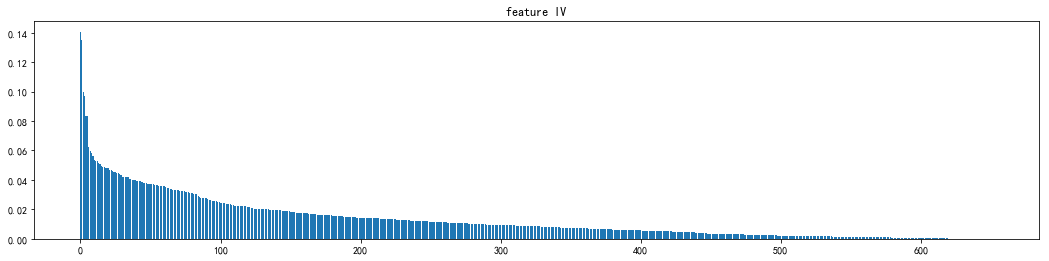

In [54]:
# 将变量IV值进行降序排列，方便后续挑选变量
IV_dict_sorted = sorted(IV_dict.items(), key=lambda x: x[1], reverse=True)

IV_values = [i[1] for i in IV_dict_sorted]
IV_name = [i[0] for i in IV_dict_sorted]

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,4))

ax = fig.add_subplot(111) 
plt.title('feature IV')
plt.bar(range(len(IV_values)), IV_values)
plt.show()

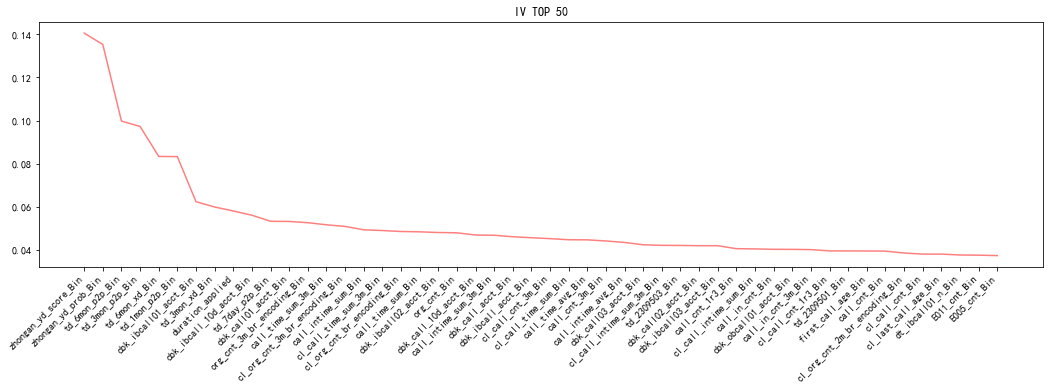

In [52]:
fig = plt.figure(figsize=(18,5))
 

ax = fig.add_subplot(111) 
plt.plot(IV_name[:50],IV_values[:50],c='red',alpha = 0.5)
fig.autofmt_xdate(rotation = 45)
plt.title("IV TOP 50")
plt.show()

-------------


### 第五步：单变量分析和多变量分析，均基于WOE编码后的值。

        （1）选择IV高于0.01的变量

         （2）比较两两线性相关性。如果相关系数的绝对值高于阈值，剔除IV较低的一个


In [56]:
# 选取IV>0.02的变量
high_IV = {k: v for k, v in IV_dict.items() if v >= 0.02}
high_IV_sorted = sorted(high_IV.items(), key=lambda x: x[1], reverse=True)

In [57]:
short_list = high_IV.keys()
short_list_2 = []
for var in short_list:
    newVar = var + '_WOE'
    dataCopy[newVar] = dataCopy[var].map(WOE_dict[var])
    short_list_2.append(newVar)

In [63]:
import seaborn as sns

,td_7day_p2p_Bin_WOE,td_1mon_p2p_Bin_WOE,td_1mon_xd_Bin_WOE,td_3mon_p2p_Bin_WOE,td_3mon_xd_Bin_WOE,td_6mon_p2p_Bin_WOE,td_6mon_xd_Bin_WOE,call01_n_Bin_WOE,ibcall01_n_Bin_WOE,ibcall2nd_n_Bin_WOE,...,zhongan_yd_prob_Bin_WOE,td_2309499_br_encoding_Bin_WOE,cl_org_cnt_br_encoding_Bin_WOE,org_cnt_1m_br_encoding_Bin_WOE,org_cnt_2m_br_encoding_Bin_WOE,cl_org_cnt_2m_br_encoding_Bin_WOE,org_cnt_3m_br_encoding_Bin_WOE,cl_org_cnt_3m_br_encoding_Bin_WOE,duration_applied_WOE,cl_org_cnt_1m_WOE
td_7day_p2p_Bin_WOE,1.000000,0.590484,0.318068,0.404977,0.301552,0.332272,0.269213,0.018813,0.008816,0.011782,...,0.092722,0.806006,0.044936,0.036237,0.044705,0.035597,0.046978,0.035394,-0.029392,0.030357
td_1mon_p2p_Bin_WOE,0.590484,1.000000,0.485427,0.675793,0.511569,0.594534,0.479944,0.025945,0.011936,0.023192,...,0.150100,0.553410,0.113001,0.094696,0.116392,0.094498,0.121842,0.104632,-0.048771,0.082206
td_1mon_xd_Bin_WOE,0.318068,0.485427,1.000000,0.422048,0.682353,0.386358,0.583714,0.015055,0.002812,0.013355,...,0.086906,0.434140,0.080477,0.066642,0.077939,0.065999,0.090756,0.074387,-0.034945,0.059137
td_3mon_p2p_Bin_WOE,0.404977,0.675793,0.422048,1.000000,0.615978,0.786258,0.596830,0.017958,0.007333,0.003897,...,0.159721,0.417468,0.173616,0.114510,0.176757,0.145441,0.199057,0.170682,-0.071279,0.098308
td_3mon_xd_Bin_WOE,0.301552,0.511569,0.682353,0.615978,1.000000,0.586895,0.819386,-0.000577,-0.015378,-0.014621,...,0.124949,0.398496,0.159219,0.114821,0.161103,0.133578,0.183972,0.156628,-0.078619,0.098602
td_6mon_p2p_Bin_WOE,0.332272,0.594534,0.386358,0.786258,0.586895,1.000000,0.659824,0.015835,0.005002,-0.003821,...,0.158784,0.355552,0.211661,0.122299,0.192175,0.161307,0.227410,0.198431,-0.078967,0.107036
td_6mon_xd_Bin_WOE,0.269213,0.479944,0.583714,0.596830,0.819386,0.659824,1.000000,-0.001141,-0.011969,-0.017601,...,0.145138,0.346735,0.204487,0.125662,0.181916,0.155564,0.220384,0.192824,-0.083915,0.110745
call01_n_Bin_WOE,0.018813,0.025945,0.015055,0.017958,-0.000577,0.015835,-0.001141,1.000000,0.776915,0.694094,...,0.012836,0.030443,-0.126206,-0.146568,-0.151368,-0.132522,-0.145623,-0.128517,-0.006728,-0.132743
ibcall01_n_Bin_WOE,0.008816,0.011936,0.002812,0.007333,-0.015378,0.005002,-0.011969,0.776915,1.000000,0.749134,...,0.009865,0.014058,-0.125508,-0.143379,-0.147653,-0.125420,-0.142285,-0.124875,0.000718,-0.131616
ibcall2nd_n_Bin_WOE,0.011782,0.023192,0.013355,0.003897,-0.014621,-0.003821,-0.017601,0.694094,0.749134,1.000000,...,0.026118,0.017158,-0.141155,-0.136176,-0.161421,-0.142324,-0.154762,-0.139040,-0.003600,-0.121633


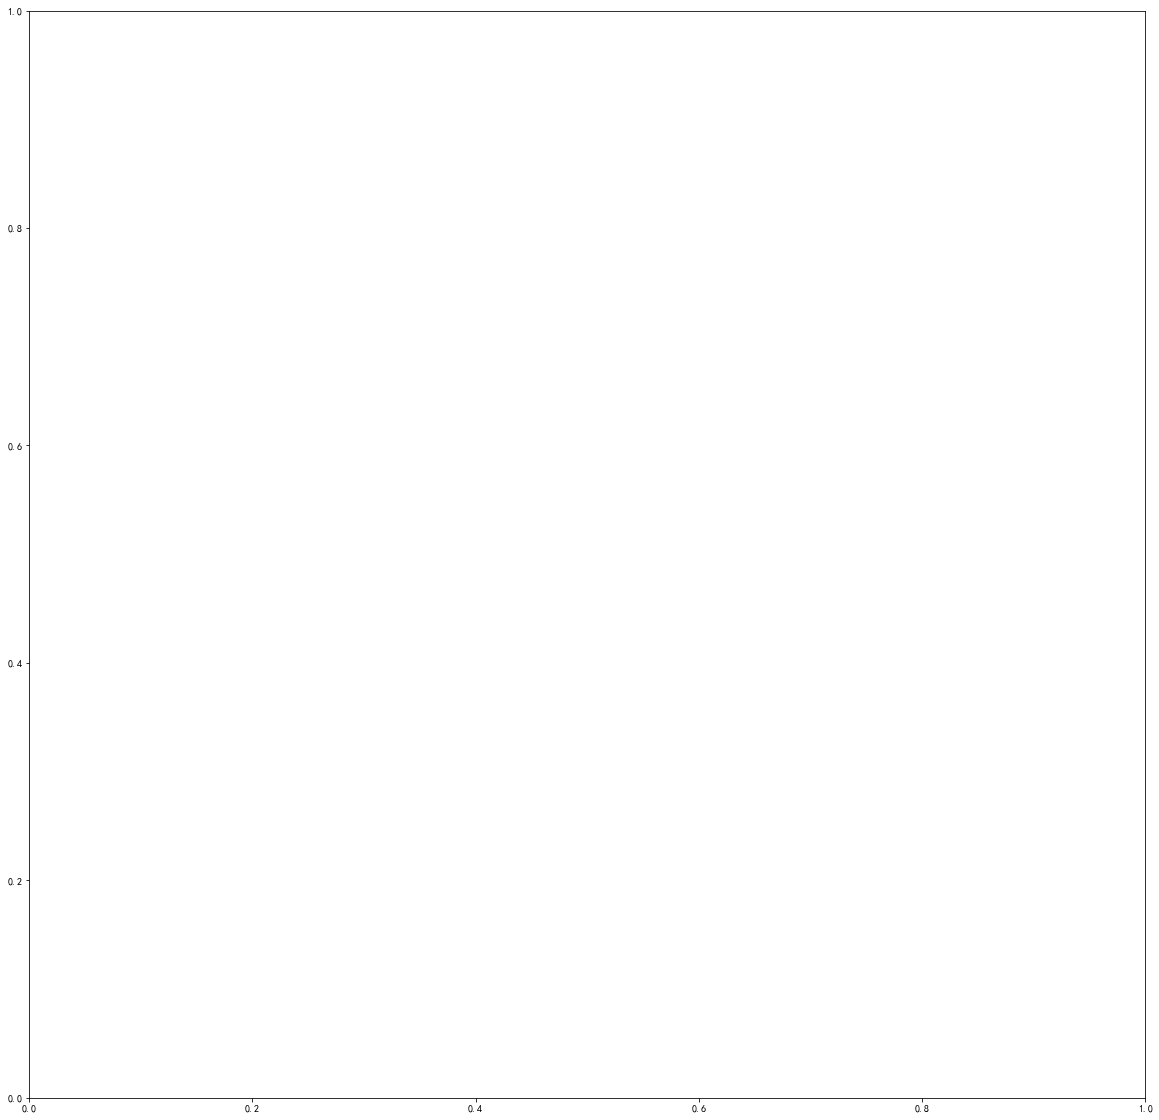

In [64]:
# 对于上一步的结果，计算相关系数矩阵，并画出热力图进行数据可视化

dataCopyWOE = dataCopy[short_list_2]

corr = dataCopyWOE.corr()

corr

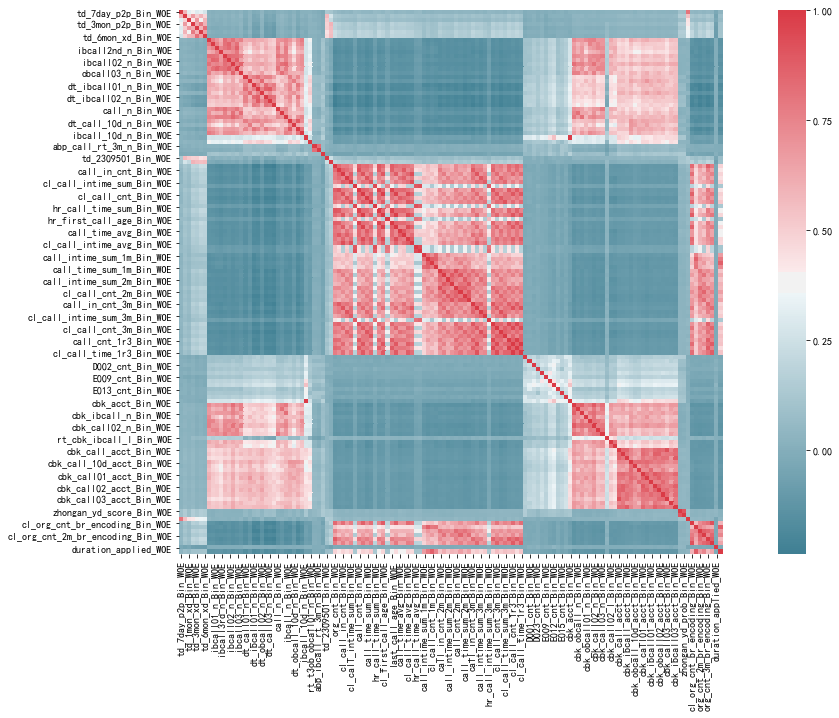

In [67]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111) 

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### 两两间的线性相关性检验

        1. 将候选变量按照IV进行降序排列
         
        2. 计算第i和第i+1的变量的线性相关系数
        
        3. 对于系数超过阈值的两个变量，剔除IV较低的一个

In [69]:

deleted_index = []
cnt_vars = len(high_IV_sorted)
for i in range(cnt_vars):
    if i in deleted_index:
        continue
    x1 = high_IV_sorted[i][0] + "_WOE"  # 'newVarWOE'
    for j in range(cnt_vars):
        if i == j or j in deleted_index:
            continue
        y1 = high_IV_sorted[j][0] + "_WOE"
        roh = np.corrcoef(dataCopy[x1], dataCopy[y1])[0, 1]
        if abs(roh) > 0.7:
            x1_IV = high_IV_sorted[i][1]
            y1_IV = high_IV_sorted[j][1]
            if x1_IV > y1_IV:
                deleted_index.append(j)
            else:
                deleted_index.append(i)

multi_analysis_vars_1 = [high_IV_sorted[i][0] + "_WOE" for i in range(cnt_vars) if i not in deleted_index]


In [70]:
multi_analysis_vars_1

['zhongan_yd_score_Bin_WOE',
 'td_6mon_p2p_Bin_WOE',
 'td_6mon_xd_Bin_WOE',
 'td_1mon_p2p_Bin_WOE',
 'cbk_ibcall01_acct_Bin_WOE',
 'duration_applied_WOE',
 'td_7day_p2p_Bin_WOE',
 'org_cnt_3m_br_encoding_Bin_WOE',
 'cl_call_intime_sum_3m_Bin_WOE',
 'td_2309503_Bin_WOE',
 'td_2309501_Bin_WOE',
 'dt_ibcall01_n_Bin_WOE',
 'E011_cnt_Bin_WOE',
 'E005_cnt_Bin_WOE',
 'B010_cnt_Bin_WOE',
 'td_1mon_xd_Bin_WOE',
 'cbk_acct_Bin_WOE',
 'dt_obcall01_n_Bin_WOE',
 'E012_cnt_Bin_WOE',
 'E013_cnt_Bin_WOE',
 'cbk_ibcall_n_Bin_WOE',
 'D001_cnt_Bin_WOE',
 'ibcall02_n_Bin_WOE',
 'cbk_obcall_10d_acct_Bin_WOE',
 'org_cnt_1m_br_encoding_Bin_WOE',
 'rt_t3ob_obcall01_n_Bin_WOE',
 'E015_cnt_Bin_WOE',
 'obcall_n_Bin_WOE',
 'cbk_obcall03_acct_Bin_WOE',
 'D023_cnt_Bin_WOE',
 'F001_cnt_Bin_WOE',
 'rt_cbk_ibcall_l_Bin_WOE',
 'hr_call_intime_avg_Bin_WOE',
 'abp_call_rt_3m_n_Bin_WOE',
 'cbk_obcall01_n_Bin_WOE',
 'ibcall3rd_n_Bin_WOE',
 'D002_cnt_Bin_WOE',
 'rgt_age_Bin_WOE',
 'cbk_call02_l_Bin_WOE',
 'E009_cnt_Bin_WOE'

In [133]:
'''
多变量分析：VIF
'''
# VIF，是表征自变量观察值之间复共线性程度的数值
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = np.matrix(dataCopy[multi_analysis_vars_1])
VIF_list = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
max_VIF = max(VIF_list)
print(max_VIF)
# 最大的VIF是3.697495363631949，因此这一步认为没有多重共线性
multi_analysis = multi_analysis_vars_1

3.643360429054247


---


### 第六步：逻辑回归模型。

要求：

    1. 变量显著
    
    2. 符号为负


In [134]:
trainData, testData = train_test_split(dataCopy)

In [135]:
### (1)将多变量分析的后变量带入LR模型中
y = dataCopy['gb']
X = dataCopy[multi_analysis]
X['intercept'] = [1] * X.shape[0]

import statsmodels.api as sm

LR = sm.Logit(y, X).fit()
summary = LR.summary()
print(summary)
print()
pvals = LR.pvalues
pvals = pvals.to_dict()
print(pvals)

Optimization terminated successfully.
         Current function value: 0.432229
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                     gb   No. Observations:                10152
Model:                          Logit   Df Residuals:                    10116
Method:                           MLE   Df Model:                           35
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:                 0.07472
Time:                        17:18:32   Log-Likelihood:                -4388.0
converged:                       True   LL-Null:                       -4742.3
                                        LLR p-value:                1.862e-126
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
zhongan_yd_score_Bin_WOE          -0.6960      0.076     -9.165     

In [136]:
### 计算KS值
def KS(df, score, target):
    '''
    :param df: 包含目标变量与预测值的数据集
    :param score: 得分或者概率
    :param target: 目标变量
    :return: KS值
    '''
    total = df.groupby([score])[target].count()
    bad = df.groupby([score])[target].sum()
    all = pd.DataFrame({'total':total, 'bad':bad})
    all['good'] = all['total'] - all['bad']
    all[score] = all.index
    all = all.sort_values(by=score,ascending=False)
    all.index = range(len(all))
    all['badCumRate'] = all['bad'].cumsum() / all['bad'].sum()
    all['goodCumRate'] = all['good'].cumsum() / all['good'].sum()
    KS = all.apply(lambda x: x.badCumRate - x.goodCumRate, axis=1)
    return max(KS)

In [137]:
from sklearn.metrics import roc_auc_score

In [138]:
# 有些变量不显著，需要逐步剔除
varLargeP = {k: v for k, v in pvals.items() if v >= 0.1}
varLargeP = sorted(varLargeP.items(), key=lambda d: d[1], reverse=True)
while (len(varLargeP) > 0 and len(multi_analysis) > 0):
    # 每次迭代中，剔除最不显著的变量，直到
    # (1) 剩余所有变量均显著
    # (2) 没有特征可选
    varMaxP = varLargeP[0][0]
    print(varMaxP)
    if varMaxP == 'intercept':
        print('the intercept is not significant!')
        break
    multi_analysis.remove(varMaxP)
    y = trainData['gb']
    X = trainData[multi_analysis]
    X['intercept'] = [1] * X.shape[0]

    LR = sm.Logit(y, X).fit()
    pvals = LR.pvalues
    pvals = pvals.to_dict()
    varLargeP = {k: v for k, v in pvals.items() if v >= 0.1}
    varLargeP = sorted(varLargeP.items(), key=lambda d: d[1], reverse=True)

summary = LR.summary()
trainData['prob'] = LR.predict(X)
ks = KS(trainData, 'prob', 'gb')
auc = roc_auc_score(trainData['gb'], trainData['prob'])
print('normalLR:ks {}, auc {}'.format(ks, auc)) #normalLR:ks 0.34434094876672416, auc 0.7332812346878717

F001_cnt_Bin_WOE
Optimization terminated successfully.
         Current function value: 0.432370
         Iterations 7
cbk_ibcall_n_Bin_WOE
Optimization terminated successfully.
         Current function value: 0.432370
         Iterations 7
ibcall3rd_n_Bin_WOE
Optimization terminated successfully.
         Current function value: 0.432376
         Iterations 7
td_1mon_p2p_Bin_WOE
Optimization terminated successfully.
         Current function value: 0.432383
         Iterations 7
org_cnt_3m_br_encoding_Bin_WOE
Optimization terminated successfully.
         Current function value: 0.432395
         Iterations 7
E011_cnt_Bin_WOE
Optimization terminated successfully.
         Current function value: 0.432408
         Iterations 7
ibcall02_n_Bin_WOE
Optimization terminated successfully.
         Current function value: 0.432428
         Iterations 7
E009_cnt_Bin_WOE
Optimization terminated successfully.
         Current function value: 0.432451
         Iterations 7
td_2309501_Bin_WOE
Opt

In [139]:
# 将模型保存
saveModel = open(folderOfData + 'LR_Model_Normal.pkl', 'wb+')
pickle.dump(LR, saveModel)
saveModel.close()


-----------

### 使用sklearn回归模型

In [141]:
# 尝试用L1约束#
## use cross validation to select the best regularization parameter
multi_analysis = multi_analysis_vars_1
X = dataCopy[multi_analysis]  # by default  LogisticRegressionCV() fill fit the intercept
X = np.matrix(X)
y = dataCopy['gb']
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# X_train.shape, y_train.shape

model_parameter = {}
for C_penalty in np.arange(0.005, 0.2, 0.005):
    for bad_weight in range(2, 101, 2):
        # print (C_penalty, bad_weight)
        
        #构建并训练模型
            ##  multi_class:分类方式选择参数，有"ovr(默认)"和"multinomial"两个值可选择，在二元逻辑回归中无区别
            ##  cv:几折交叉验证
            ##  solver:优化算法选择参数，当penalty为"l1"时，参数只能是"liblinear(坐标轴下降法)"
            ##  "lbfgs"和"cg"都是关于目标函数的二阶泰勒展开
            ##  当penalty为"l2"时，参数可以是"lbfgs(拟牛顿法)","newton_cg(牛顿法变种)","seg(minibactch随机平均梯度下降)"
            ##  维度<10000时，选择"lbfgs"法，维度>10000时，选择"cs"法比较好，显卡计算的时候，lbfgs"和"cs"都比"seg"快
            ##  penalty:正则化选择参数，用于解决过拟合，可选"l1","l2"
            ##  tol:当目标函数下降到该值是就停止，叫：容忍度，防止计算的过多

        LR_model_2 = LogisticRegressionCV(Cs=[C_penalty], penalty='l1', solver='liblinear',
                                          class_weight={1: bad_weight, 0: 1})
        LR_model_2_fit = LR_model_2.fit(X_train, y_train)
        y_pred = LR_model_2_fit.predict_proba(X_test)[:, 1]  # 概率估计
        scorecard_result = pd.DataFrame({'prob': y_pred, 'target': y_test})
        # performance = KS_AR(scorecard_result,'prob','target')
        KS = KS(scorecard_result, 'prob', 'target')
        model_parameter[(C_penalty, bad_weight)] = KS

# endtime = datetime.datetime.now()
# print ((endtime - starttime).seconds)
print('Best paramter is:\n{}'.format(sorted(model_parameter.items(), key=lambda x: x[1])[-1]))
#Best paramter is: ((0.19500000000000001, 34), 0.34889295240454987)
#%%
# from sklearn.linear_model import LogisticRegression
# l1_logit = LogisticRegression(class_weight={1:34, 0:1}).fit(X,y)
# saveModel = open(folderOfData + 'LR_classweight', 'wb+')
# pickle.dump(l1_logit, saveModel)
# saveModel.close()

TypeError: 'float' object is not callable

R值(准确率): 0.8235551663747811


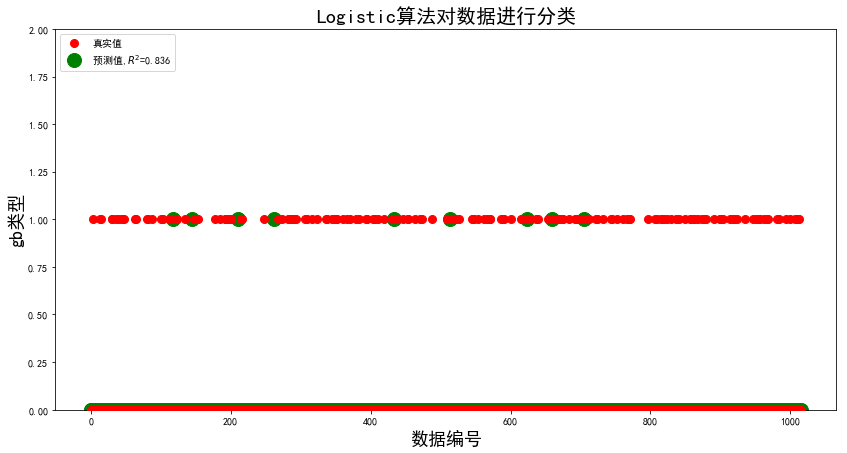

In [152]:
X = dataCopy[multi_analysis]  # by default  LogisticRegressionCV() fill fit the intercept
y = dataCopy['gb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
#print(len(X_train))
#print(len(X_test))
lr = LogisticRegressionCV()
re = lr.fit(X_train,y_train)
r = re.score(X_train,y_train)
print("R值(准确率):",r)


Y_predict = lr.predict(X_test)      #预测


x = range(len(X_test))
plt.figure(figsize=(14,7),facecolor="w")
plt.ylim(0,2)
plt.plot(x,y_test,"ro",markersize=8,zorder=3,label=u"真实值")
plt.plot(x,Y_predict,"go",markersize=14,zorder=2,label=u"预测值,$R^2$=%.3f" %lr.score(X_test,y_test))
plt.legend(loc="upper left")
plt.xlabel(u"数据编号",fontsize=18)
plt.ylabel(u"gb类型",fontsize=18)
plt.title(u"Logistic算法对数据进行分类",fontsize=20)
#plt.savefig("Logistic算法对数据进行分类.png")
plt.show()